In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

%matplotlib inline

In [243]:
train_df = pd.read_csv('input/train.csv')
train_df.head()

test_df0 = pd.read_csv('input/test.csv')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [22]:
# train_df.loc[train_df['Parch'] > 0, 'Parch'] = 1
# train_df.loc[train_df['SibSp'] > 0, 'SibSp'] = 1

In [226]:
train_naive = train_df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)
test_df = test_df0.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

train_naive['Sex'] = train_naive['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})


train_naive.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


Name中提取Title

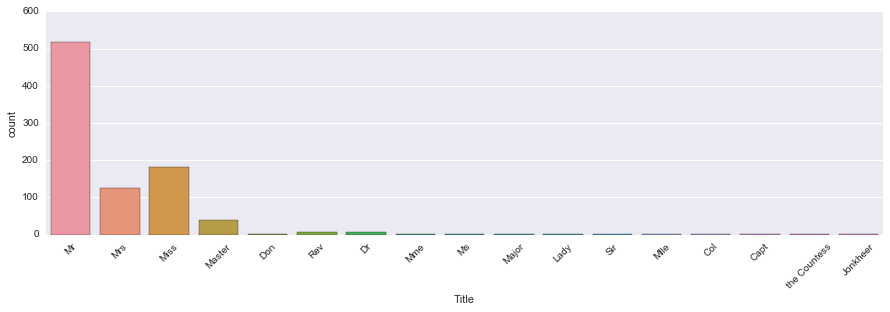

In [227]:
train_naive['Title'] = pd.Series([name.split(',')[1].split('.')[0].strip() for name in train_naive['Name']])
test_df['Title'] = pd.Series([name.split(',')[1].split('.')[0].strip() for name in test_df['Name']])

plt.figure(figsize=(15, 4))
g = sns.countplot(train_naive['Title'])
g = plt.setp(g.get_xticklabels(), rotation=45)

In [228]:
train_naive['Title'] = train_naive['Title'].replace(
    ['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 
    'Rare'
)
train_naive['Title'] = train_naive['Title'].map(
    {"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3}
)
train_naive['Title'] = train_naive['Title'].astype(int)


test_df['Title'] = test_df['Title'].replace(
    ['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 
    'Rare'
)
test_df['Title'] = test_df['Title'].map(
    {"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3}
)
test_df['Title'] = test_df['Title'].astype(int)

In [229]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null int64
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
Title       418 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


Age 填充

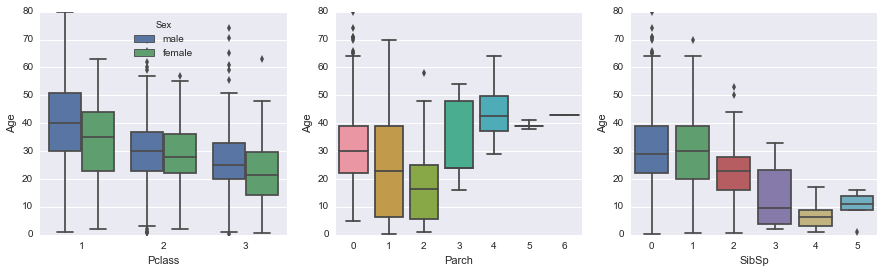

In [230]:
df_age = train_df.loc[~train_df['Age'].isnull(), :]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

ax = sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df_age, ax=axs[0])
ax = sns.boxplot('Parch', 'Age', data=df_age, ax=axs[1])
ax = sns.boxplot('SibSp', 'Age', data=df_age, ax=axs[2])

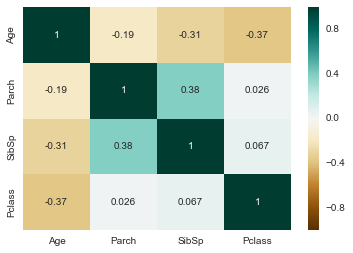

In [217]:
ax = sns.heatmap(df_age[['Age', 'Sex', 'Parch', 'SibSp', 'Pclass']].corr(), cmap='BrBG', annot=True)

In [231]:
for i in train_naive.index:
    if np.isnan(train_naive.loc[i]['Age']):
        age_pred = train_naive['Age'][(train_naive['Pclass'] == train_naive.loc[i]['Pclass']) 
                                        & (train_naive['Sex'] == train_naive.loc[i]['Sex'])
                                        & (train_naive['SibSp'] == train_naive.loc[i]['SibSp'])
                                        & (train_naive['Parch'] == train_naive.loc[i]['Parch'])
                                      ].median()

        if np.isnan(age_pred):
            age_pred = train_naive['Age'][(train_naive['Pclass'] == train_naive.loc[i]['Pclass']) 
                                            & (train_naive['SibSp'] == train_naive.loc[i]['SibSp'])
                                            & (train_naive['Parch'] == train_naive.loc[i]['Parch'])
                                          ].median()
            
        if np.isnan(age_pred):
            age_pred = train_naive['Age'][(train_naive['Pclass'] == train_naive.loc[i]['Pclass']) 
                                          & (train_naive['Parch'] == train_naive.loc[i]['Parch'])
                                         ].median()
        
        if np.isnan(age_pred):
            age_pred = train_naive['Age'][train_naive['Pclass'] == train_naive.loc[i]['Pclass']].median()
           
        train_naive.loc[i, 'Age'] = age_pred

In [232]:
for i in test_df.index:
    if np.isnan(test_df.loc[i]['Age']):
        age_pred = train_naive['Age'][(train_naive['Pclass'] == test_df.loc[i]['Pclass']) 
                                        & (train_naive['Sex'] == test_df.loc[i]['Sex'])
                                        & (train_naive['SibSp'] == test_df.loc[i]['SibSp'])
                                        & (train_naive['Parch'] == test_df.loc[i]['Parch'])
                                      ].median()

        if np.isnan(age_pred):
            age_pred = train_naive['Age'][(train_naive['Pclass'] == test_df.loc[i]['Pclass']) 
                                            & (train_naive['SibSp'] == test_df.loc[i]['SibSp'])
                                            & (train_naive['Parch'] == test_df.loc[i]['Parch'])
                                          ].median()
            
        if np.isnan(age_pred):
            age_pred = train_naive['Age'][(train_naive['Pclass'] == test_df.loc[i]['Pclass']) 
                                          & (train_naive['Parch'] == test_df.loc[i]['Parch'])
                                         ].median()
        
        if np.isnan(age_pred):
            age_pred = train_naive['Age'][train_naive['Pclass'] == test_df.loc[i]['Pclass']].median()
           
        test_df.loc[i, 'Age'] = age_pred

In [233]:
train_naive.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,2


In [234]:
train_naive.drop(['Embarked', 'Name'], axis=1, inplace=True)

In [237]:
test_df.loc[test_df['Fare'].isnull(), 'Fare'] = test_df.loc[(test_df['Pclass']==3) & (test_df['Embarked']=='S'), 'Fare'].median()

In [240]:
test_df.drop(['Embarked', 'Name'], axis=1, inplace=True)

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass    418 non-null int64
Sex       418 non-null int64
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      418 non-null float64
Title     418 non-null int64
dtypes: float64(2), int64(5)
memory usage: 22.9 KB


## 学习

In [222]:
X = train_naive.drop('Survived', axis=1)
y = train_naive['Survived']

In [223]:
from sklearn.model_selection import cross_val_score

logistic = LogisticRegression(C=15)
score = cross_val_score(logistic, X, y, cv=3)
score

array([ 0.80808081,  0.82491582,  0.82828283])

In [224]:
logistic = LogisticRegression(C=10)
logistic.fit(X, y)
logistic.score(X, y)

0.82603815937149272

In [247]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)

score = cross_val_score(random_forest, X, y, cv=3)
score

array([ 0.78114478,  0.86531987,  0.81818182])

In [249]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X, y)

random_forest.score(X, y)

0.98092031425364756

In [241]:
X_test = test_df

In [250]:
result = pd.DataFrame({'PassengerId': test_df0['PassengerId'], 'Survived': random_forest.predict(X_test)})
result.to_csv("output/logistic_regression_predictions.csv", index=False)